In [2]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline



oliv = fetch_olivetti_faces(data_home='data')
print oliv.keys()
print oliv.data.shape

['images', 'data', 'target', 'DESCR']
(400, 4096)


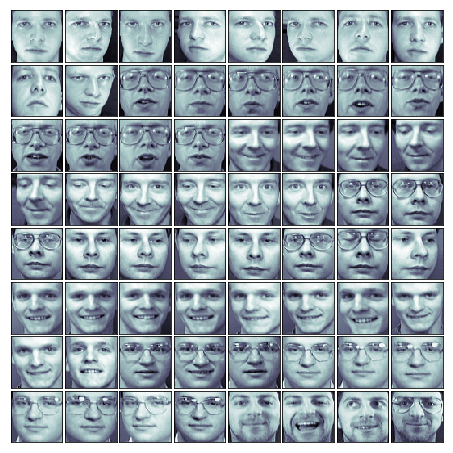

In [3]:
#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64): 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest') 
plt.show()

In [4]:
#Let's see how much of the variance is retained if we compressed these down to a 8x8 (64) pixel images.

X,y=oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print X_proj.shape

(400, 64)


In [ ]:

print np.cumsum(pca_oliv.explained_variance_ratio_)

In [ ]:
print(pca_oliv.components_)
print(pca_oliv.components_.shape)

In [ ]:
#This is great so far. Now we have a reduced 64 dimension dataset, generated with 64 principal components. 
#Each of these principal components can explain some variation in the original dataset. The parameter components_ of the 
#estimator object gives the components with maximum variance

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

In [ ]:
#Awesome, let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the 
#64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform the 8x8 images 
#back to 64x64 dimension. Note that we're not reverting back to the original data, we're simply going back to the 
#actual dimension of the original images so we can visualize them.

X_inv_proj = pca_oliv.inverse_transform(X_proj)
#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')